<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/AdaBoosing_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_circles
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from mlxtend.plotting import plot_decision_regions

In [25]:
np.random.seed(42)

In [26]:
X,y= make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

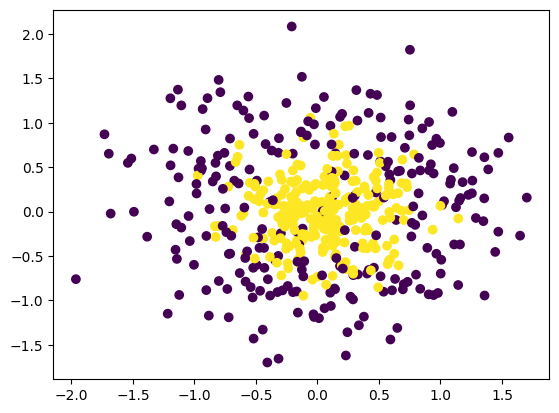

In [27]:
plt.scatter(X[:,0],X[:,1],c=y)

In [28]:
abc=AdaBoostClassifier()

In [29]:
abc.fit(X,y)

AdaBoostClassifier()

In [32]:
np.round(np.mean(cross_val_score(abc,X,y,scoring='accuracy', cv=10)),2)

np.float64(0.81)

[Text(0.5, 0.75, 'x[0] <= 0.745\ngini = 0.5\nsamples = 500\nvalue = [0.5, 0.5]'),
 Text(0.25, 0.25, 'gini = 0.492\nsamples = 438\nvalue = [0.384, 0.492]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.121\nsamples = 62\nvalue = [0.116, 0.008]'),
 Text(0.625, 0.5, '  False')]

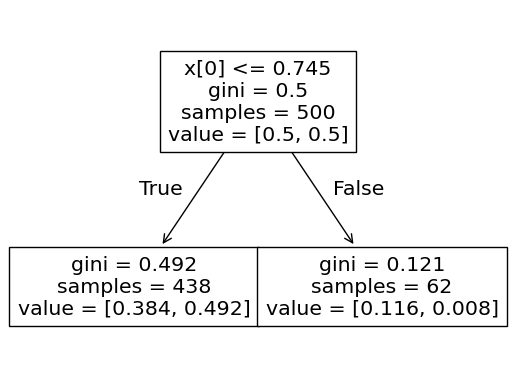

In [53]:
plot_tree(abc.estimators_[0])

<Axes: >

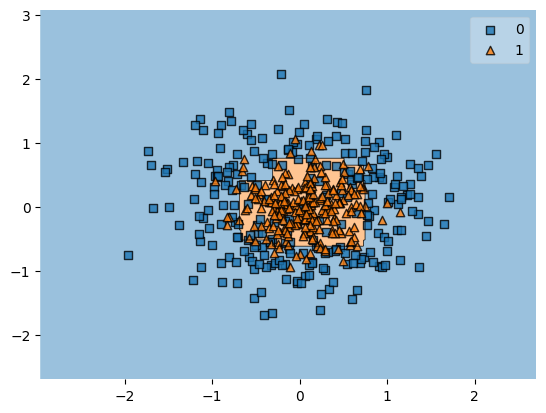

In [51]:
plot_decision_regions(X,y,clf=abc.estimators_[0])

In [49]:
def plot_decision_boundary(clf):
  plt.figure(figsize=(10,10))

  X_range=np.linspace(X.min(), X.max(),100)
  XX1,XX2=np.meshgrid(X_range, X_range)

  y_hat=clf.predict(np.c_[XX1.ravel(), XX2.ravel()]).reshape(XX1.shape)

  plt.contourf(XX1,XX2, y_hat, alpha=0.7)
  plt.scatter(X[:,0],X[:,1], cmap='viridis',c=y)

  plt.title("Adaboost classfier")
  plt.show()

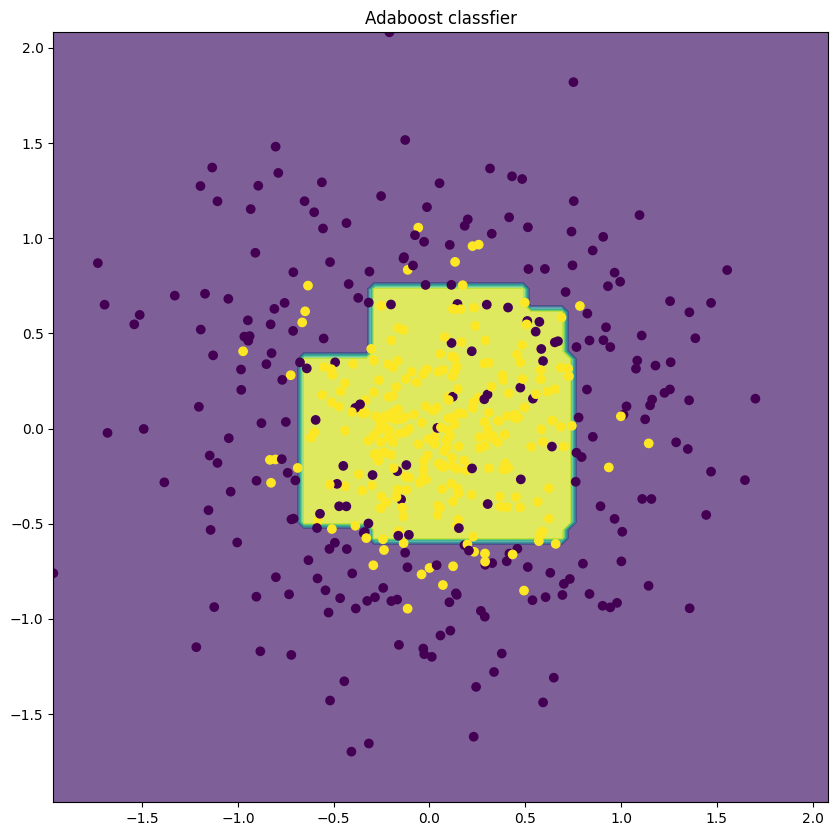

In [50]:
plot_decision_boundary(abc)

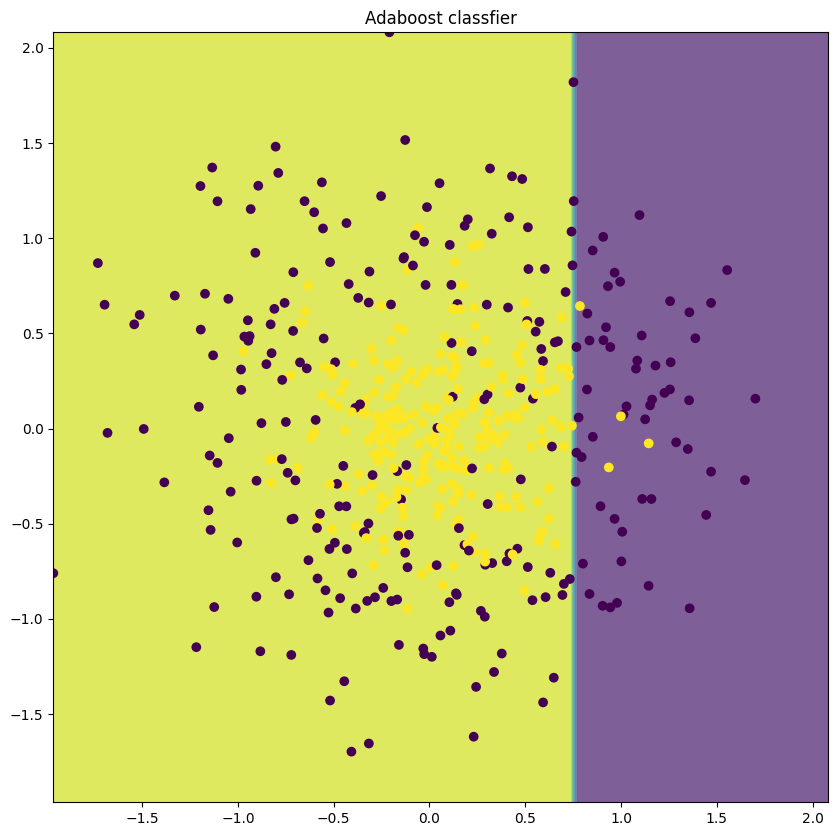

In [54]:
abc=AdaBoostClassifier(n_estimators=1)
abc.fit(X,y)
plot_decision_boundary(abc)

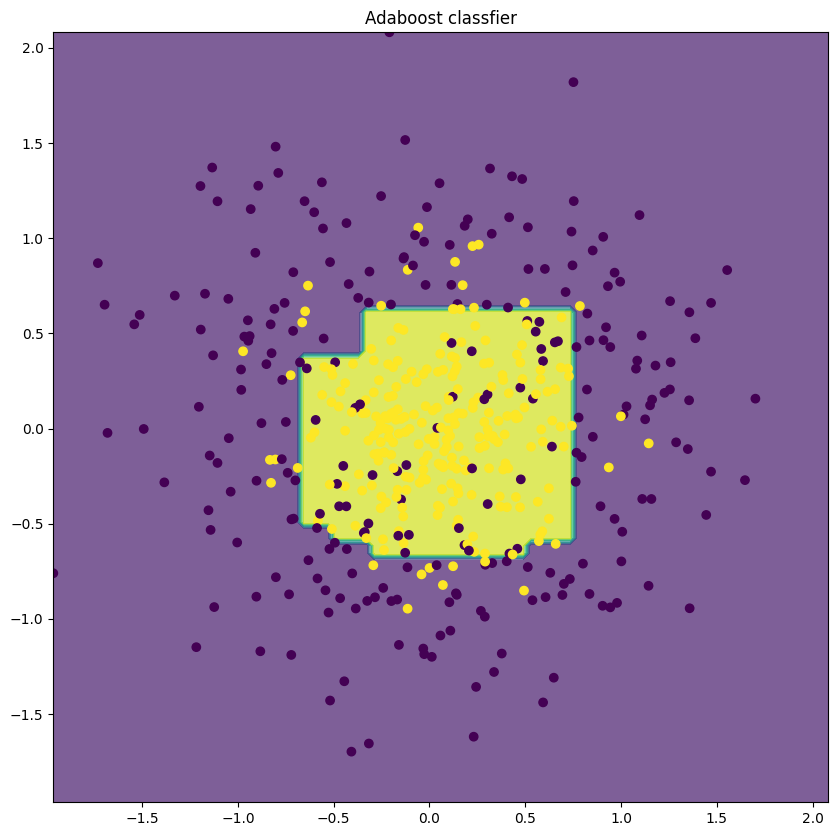

In [59]:
abc=AdaBoostClassifier(n_estimators=1000,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)